(1000, 2)


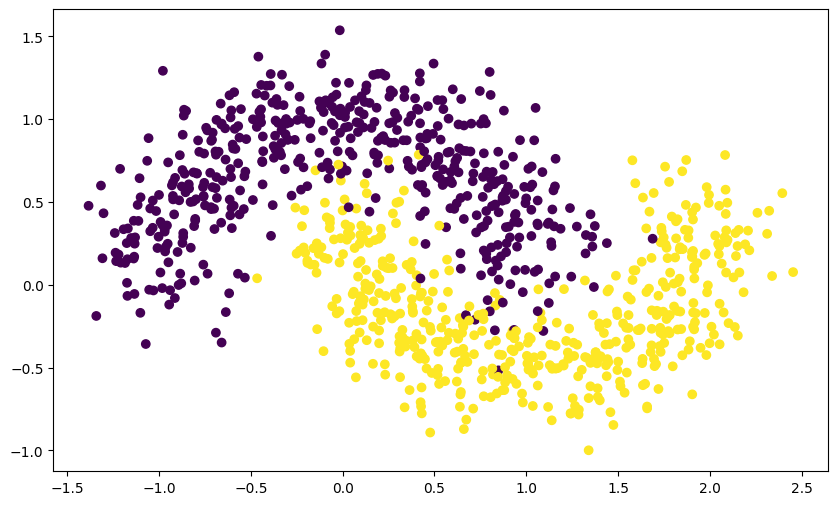

In [117]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

rng = jax.random.PRNGKey(np.random.randint(0, 10000))

x, y = make_moons(n_samples=1000, noise=0.2, random_state=0)

print(x.shape)
    
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y);


In [118]:
from attention import Dense, DenseState, sigmoid, relu
from loss import BCELoss
from jax import random
BATCH_SIZE = 1

class Network:
    def __init__(self):
        self.layers = [Dense(2, 25), Dense(25, 25), Dense(25, 1)]

    def __call__(self, state, x):
        for substate, layer in zip(state[:-1], self.layers[:-1]):
            x = relu(layer(substate, x))
        return sigmoid(self.layers[-1](state[-1], x))

    def init_params(self, rng) -> list[DenseState]:
        keys = random.split(rng, len(self.layers))
        return [layer.init_state(key) for layer, key in zip(self.layers, keys)]

net = Network()
state = net.init_params(rng)

print(x[0])

pred = net(state, x[0])
print(pred)

[2.08614399 0.57401401]
[0.4998608]


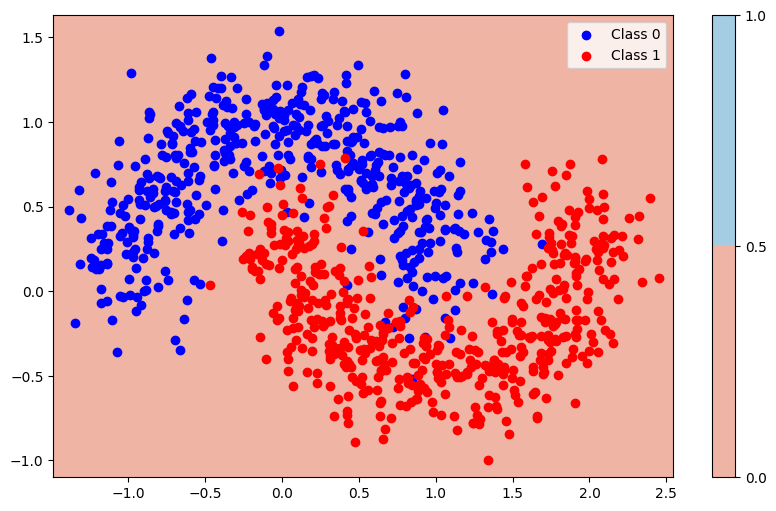

In [121]:
import numpy as np

def plot_decision_boundary(net, X, Y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

    mesh_probs = net(state, mesh_points).reshape(xx.shape)

    # Create a contour plot to display the decision boundary
    plt.contourf(xx, yy, mesh_probs, levels=[0, 0.5, 1], cmap=plt.cm.RdBu, alpha=0.6)
    plt.colorbar()

    # Plot the data points for the two classes
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1')

    # Set labels and legend
    plt.legend(loc='best')

    # Display the decision boundary as a solid line
    contours = plt.contour(xx, yy, mesh_probs, levels=[0.5], colors='k', linewidths=2)
    plt.clabel(contours, inline=True, fontsize=12)

    plt.show()

plt.figure(figsize=(10, 6))
plot_decision_boundary(net, x, y)